# Project 3 - Pandas & Seaborn 201
---

- Your Name Here: Nik Baldis
- WFU Email Address: baldnj23@wfu.edu
- Submission Date: 7/29/2023

# Instructions

1. Download the notebook `pandas_seaborn_201_yournamehere.ipynb` and the dataset `Customer Churn.csv` from the course website.

2. Open the notebook on your local computer; Or upload and open it in Google Colab.

3. Replace the placeholder text above with your name, email address, and submission date.

4. This is a simple project made up of mini-tasks. Simply write the code to answer the question, and be sure to display your results!

5. Please submit your notebook in **HTML** on Canvas.

# Who is likely to churn?
You are competing for a job as a business analyst working for a mobile phone company like Verizon, Mint Mobile, or AT&T. As part of the interview process, you have been tasked with exploring which customers are likely to “churn”.

**Customer churn**, also known as customer attrition, occurs when customers stop doing business with a company or stop using a company’s services. The company uses an annual valuation of $1200 per customer so if a customer churns (i.e. switches service) they are out a considerable sum of money.

The company believes...
- Churn is influenced by the *network speed* (5G or 4G LTE) and the *phone model*
- Customers who opt for *paperless billing* are less likely to churn

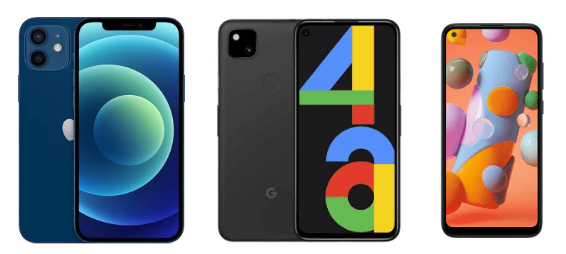

# Some Expectations
- Think about the business problem and how your analysis can address the problem
- Make sure **any chart** you create has: **title, x & y axis labels, and a description of why someone would care to look at it**
- Make sure you spend time understanding what your code does.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 0. Load libraries

Load the following libraries, you may need to install them first!
- Data Manipulation: `pandas`, `numpy`
- Data Visualization：`seaborn`, `matplotlib.pyplot`
- Other: `warnings` (ignore warning messages)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Task 1. Stage

1. Use `pd.read_csv()` to read in the `Customer Churn.csv` data file, store it as a data frame named `"df_churn"`

2. Display the first 5 records
> Tip: For wide data, try `df.head().T` to display all the columns

3. Check its shape and respective data types using `info()`


In [ ]:
df_churn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project 3/Customer Churn.csv')
df_churn

,monthly_minutes,customer_service_calls,streaming_minutes,total_billed,prev_balance,late_payments,ip_address_asn,phone_area_code,customer_reg_date,email_domain,...,currency_code,maling_code,paperless_billing,payment_method,customer_id,billing_address,gender,network_speed,senior_citizen,churn
0,22604.0,2.0,26525.0,285.0,47.0,5.0,16767.0,253.0,2020-04-15,yahoo.com,...,usd,H,No,Mailed Check,1-136-08562-9.1,5592 Gill Pine Suite 387,Female,5G,1.0,0
1,17059.0,2.0,16887.0,201.0,45.0,5.0,53966.0,241.0,2020-04-12,gmail.com,...,eur,V,Yes,Mailed Check,0-384-11264-1.2,5806 Kathleen Mount Suite 186,Male,5G,0.0,0
2,25848.0,2.0,26783.0,264.0,44.0,6.0,19278.0,232.0,2020-02-22,gmail.com,...,cad,R,Yes,Credit Card,0-08-151665-7.3,5037 Allen Square Apt. 727,Male,5G,1.0,0
3,22080.0,3.0,23649.0,274.0,49.0,6.0,16680.0,236.0,2020-08-05,yahoo.com,...,cad,N,No,Mailed Check,0-02-200816-0.4,841 Griffin Route Suite 824,Female,5G,0.0,0
4,23871.0,3.0,7705.0,236.0,61.0,5.0,51308.0,243.0,2019-11-16,gmail.com,...,cad,V,Yes,Electronic Check,0-87476-135-2.5,46185 Mejia Manor Apt. 558,Male,4Glte,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90896,20872.0,3.0,13754.0,284.0,49.0,4.0,42501.0,234.0,2020-03-13,gmail.com,...,cad,C,Yes,Electronic Check,0-487-47705-7.100995,0050 Courtney Crescent Apt. 306,Female,5G,1.0,0
90897,15244.0,2.0,19118.0,270.0,50.0,6.0,56225.0,259.0,2020-09-06,gmail.com,...,cad,H,No,Electronic Check,0-542-94214-3.100996,55103 Lynch Alley Apt. 534,Female,4Glte,1.0,0
90898,16427.0,1.0,22345.0,276.0,58.0,4.0,54916.0,250.0,2020-07-05,gmail.com,...,cad,U,No,Electronic Check,1-4059-0436-4.100997,73739 Heather Green Suite 266,Female,5G,0.0,0
90899,24106.0,1.0,27419.0,268.0,54.0,4.0,55589.0,262.0,2020-05-12,hotmail.com,...,cad,U,Yes,Mailed Check,0-03-923051-1.100998,5816 Emily Tunnel,Female,4Glte,1.0,0


In [ ]:
df_churn.head(5).T

,0,1,2,3,4
monthly_minutes,22604.0,17059.0,25848.0,22080.0,23871.0
customer_service_calls,2.0,2.0,2.0,3.0,3.0
streaming_minutes,26525.0,16887.0,26783.0,23649.0,7705.0
total_billed,285.0,201.0,264.0,274.0,236.0
prev_balance,47.0,45.0,44.0,49.0,61.0
late_payments,5.0,5.0,6.0,6.0,5.0
ip_address_asn,16767.0,53966.0,19278.0,16680.0,51308.0
phone_area_code,253.0,241.0,232.0,236.0,243.0
customer_reg_date,2020-04-15,2020-04-12,2020-02-22,2020-08-05,2019-11-16
email_domain,yahoo.com,gmail.com,gmail.com,yahoo.com,gmail.com


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90901 entries, 0 to 90900
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   monthly_minutes         90881 non-null  float64
 1   customer_service_calls  90879 non-null  float64
 2   streaming_minutes       90879 non-null  float64
 3   total_billed            90867 non-null  float64
 4   prev_balance            90879 non-null  float64
 5   late_payments           90881 non-null  float64
 6   ip_address_asn          90884 non-null  float64
 7   phone_area_code         90873 non-null  float64
 8   customer_reg_date       90874 non-null  object 
 9   email_domain            90873 non-null  object 
 10  phone_model             90876 non-null  object 
 11  billing_city            90872 non-null  object 
 12  billing_postal          90873 non-null  float64
 13  billing_state           90875 non-null  object 
 14  partner                 90876 non-null

## Task 2. Cleansing & Profiling (Part I)

Our dataset contains in following varibales:
- **monthly_minutes**: Monthly usage in minutes
- **customer_service_calls**:	# of calls to customer services
- **streaming_minutes**: Monthly streaming in minutes
- **total_billed**:	Total bill amount in $
- **prev_balance**:	Previous balance statement
- **late_payments**: # of late payments
- **ip_address_asn**:	IP address
- **phone_area_code**: Phone area code
- **customer_reg_date**: Customer registration date
- **email_domain**:	Customer email
- **phone_model**: Phone model
- **billing_city**:	Billing city
- **billing_postal**:	Billing zip code
- **billing_state**:	Billing state
- **partner**:	A partnering company who helped initiate the phone contract
- **phone_service**:	phone service
- **multiple_lines**:	multiple lines
- **streaming_plan**:	streaming plan
- **mobile_hotspot**:	mobile hotspot
- **wifi_calling_text**: wifi calling text
- **online_backup**:	online backup
- **device_protection**:	device protection
- **number_phones**:	# of phones obtained
- **contract_code**:	code of the contract with the company
- **currency_code**:	payment currency
- **maling_code**:	mailing code
- **paperless_billing**:	opt for paperless billing
- **payment_method**:	payment method
- **customer_id**:	customer id
- **billing_address**: full billing address
- **gender**:	gender
- **network_speed**:	network speed
- **senior_citizen**:	if the customer is a senior citizen
- **churn**:	if the customer churned


1. Let's begin with cleaning the data types:

- Correct the data types for variable `billing_postal`, `phone_area_code`, `ip_address_asn` to **'object'**
> May use the code like this:
```python
df['variable'] = df['variable'].astype('object')
```

- Correct the data type of variable `churn`, `senior_citizen` to **'bool'**

- Correct the data type of variable `customer_reg_date` to **'datetime64'**
> Hint: `pd.to_datetime()`

2. Select all **numerical variables** using `select_dtypes()`, put their column names in a `list`
> Hint: `df.select_dtypes(include=['int64', 'float64']).columns.to_list()`

3. For Loop Automation: Fire up a for loop that creates a histogram for each variable using `sns.histplot()`, with `hue='churn'`.
>Hint: A good reference is [here](https://colab.research.google.com/drive/193chykBcPCS1AJ4u73cblqY_HbvWW86C?usp=sharing).

4. **Articulate 3 key findings you derived from the generated plots**

In [ ]:
#Correct the data types for variable billing_postal, phone_area_code, ip_address_asn to 'object'
#May use the code like this:
#df['variable'] = df['variable'].astype('object')
df_churn['billing_postal'] = df_churn['billing_postal'].astype('object')
df_churn['phone_are_code'] = df_churn['phone_area_code'].astype('object')
df_churn['ip_address_asn'] = df_churn['ip_address_asn'].astype('object')

In [ ]:
#Checking to make sure it worked
df_churn['ip_address_asn']

0        16767.0
1        53966.0
2        19278.0
3        16680.0
4        51308.0
          ...   
90896    42501.0
90897    56225.0
90898    54916.0
90899    55589.0
90900    14379.0
Name: ip_address_asn, Length: 90901, dtype: object

In [ ]:
#Correct the data type of variable churn, senior_citizen to 'bool'
df_churn['senior_citizen'] = df_churn['senior_citizen'].astype('bool')
df_churn['churn'] = df_churn['churn'].astype('bool')

In [ ]:
#Checking to make sure it worked
#df_churn['senior_citizen']
df_churn['churn']

0        False
1        False
2        False
3        False
4        False
         ...  
90896    False
90897    False
90898    False
90899    False
90900    False
Name: churn, Length: 90901, dtype: bool

In [ ]:
#Correct the data type of variable customer_reg_date to 'datetime64'
#Hint: pd.to_datetime()
#This is the current format: 2020-04-15
df_churn['customer_reg_date'] = pd.to_datetime(df_churn['customer_reg_date'], format="%Y/%m/%d")
df_churn['customer_reg_date']

0       2020-04-15
1       2020-04-12
2       2020-02-22
3       2020-08-05
4       2019-11-16
           ...    
90896   2020-03-13
90897   2020-09-06
90898   2020-07-05
90899   2020-05-12
90900   2019-11-11
Name: customer_reg_date, Length: 90901, dtype: datetime64[ns]

In [ ]:
#Select all numerical variables using select_dtypes(), put their column names in a list
#Hint: df.select_dtypes(include=['int64', 'float64']).columns.to_list()
df_churn_num = df_churn.select_dtypes(include=['int64', 'float64']).columns.to_list()
df_churn_num

['monthly_minutes',
 'customer_service_calls',
 'streaming_minutes',
 'total_billed',
 'prev_balance',
 'late_payments',
 'phone_area_code',
 'number_phones']

In [ ]:
#For Loop Automation: Fire up a for loop that creates a histogram for each variable using sns.histplot(), with hue='churn'.

Testing Steps

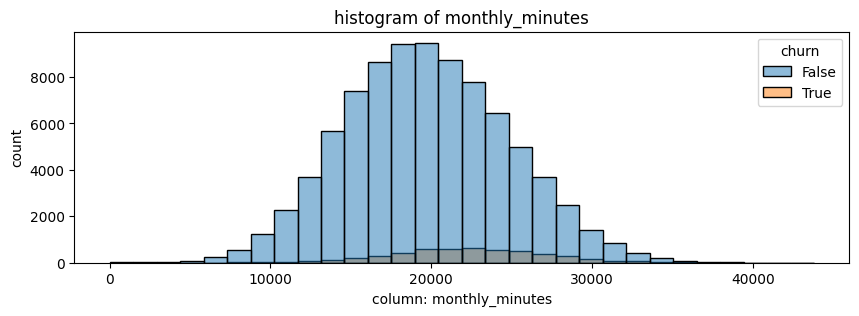

In [ ]:
#Baseline Code
test_column = 'monthly_minutes'

plt.figure(figsize=(10,3))
sns.histplot(data=df_churn, x=test_column, hue='churn', bins=30)
plt.title(f"histogram of {test_column}")
plt.xlabel(f"column: {test_column}")
plt.ylabel("count")
plt.show();


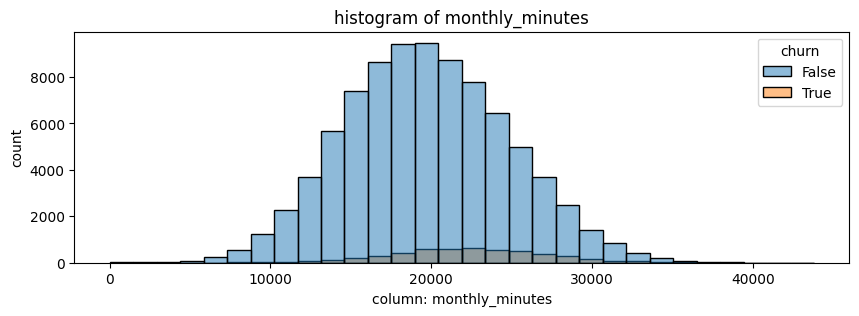

In [ ]:
def churn(test_column):
  plt.figure(figsize=(10,3))
  sns.histplot(data=df_churn, x=test_column, hue='churn', bins=30)
  plt.title(f"histogram of {test_column}")
  plt.xlabel(f"column: {test_column}")
  plt.ylabel("count")
  plt.show();
churn(test_column)

Real Loop

In [ ]:
#def churn(column):
  #plt.figure(figsize=(10,3))
  #sns.histplot(data=df_churn, x=column, hue='churn', bins=30)
  #plt.title(f"histogram of {column}")
  #plt.xlabel(f"column: {column}")
  #plt.ylabel("count")
  #plt.show();
#churn(column)

In [ ]:
for column in df_churn_num:
  print(column)

monthly_minutes
customer_service_calls
streaming_minutes
total_billed
prev_balance
late_payments
phone_area_code
number_phones


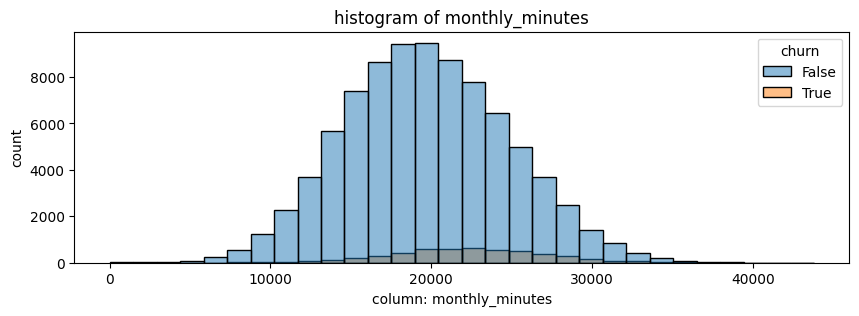

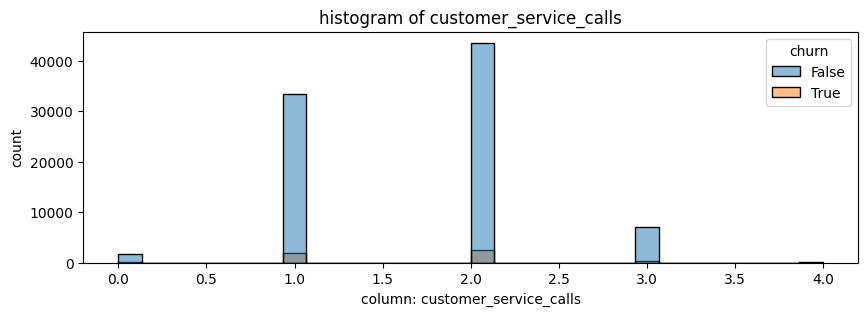

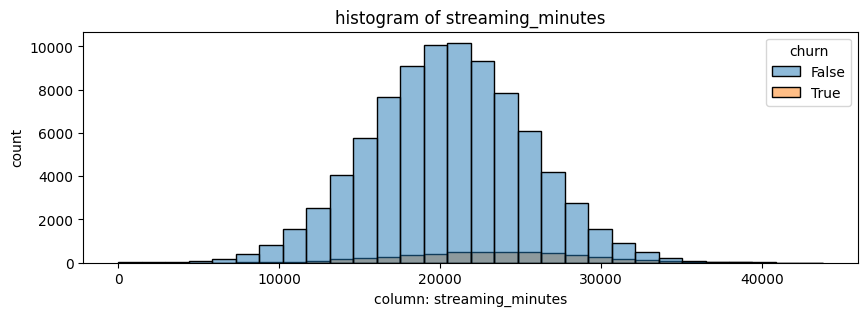

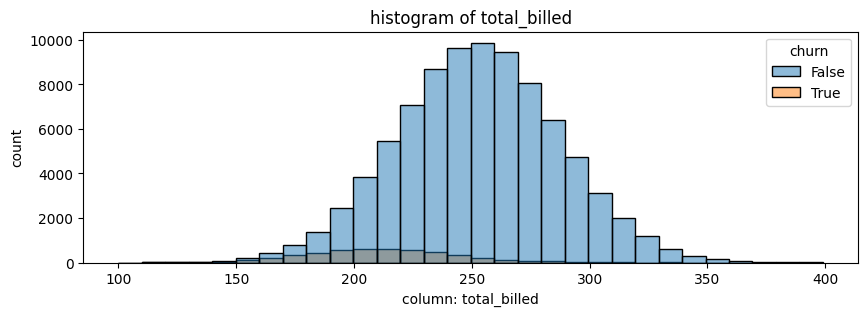

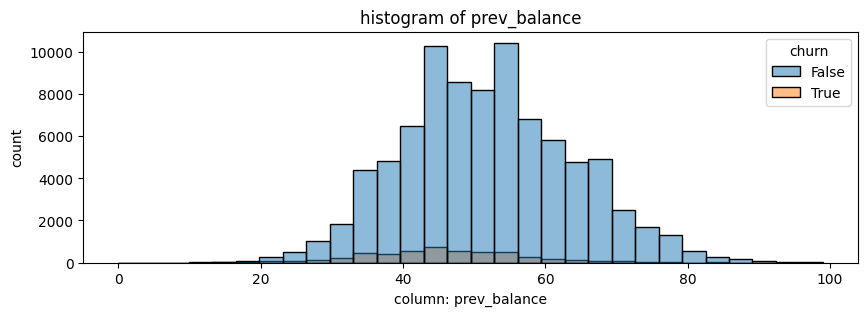

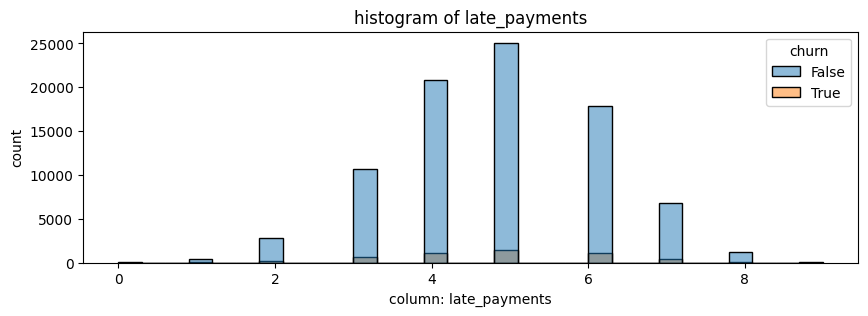

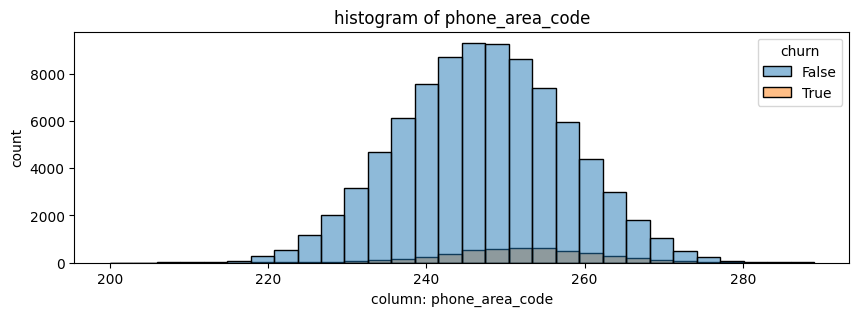

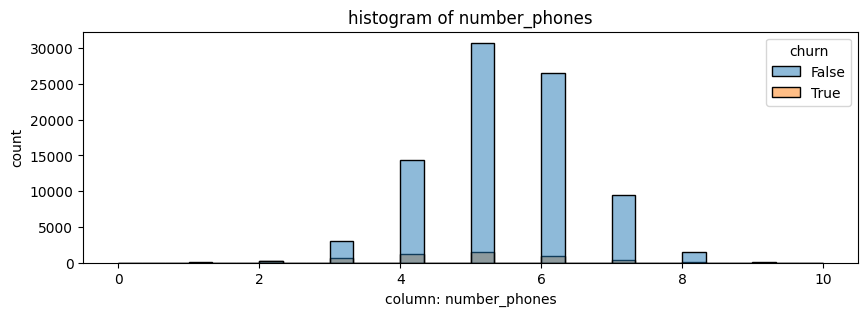

In [ ]:
for column in df_churn_num:
  churn(column)

**Your Findings:**

**1. Customers that have churned are most likely to have missed 5 payments.**

**2. Previous Balance is bimodal.  About \$45 and About \$55 is the most common previous balance to have for customers that have churned.  This can be an indicator for a company to flag that customer for the future.**

**3. The most common amount of phones to have for a "churning" customer is 5.**

## Task 3. Cleansing & Profiling (Part II)

1. Start by selecting all **categorical and boolean variables** using `select_dtypes()`, put their column names in a `list`
> Hint: include=['object','bool']

2. Remove the following variables from the list: `customer_id`, `billing_address`, `billing_city`, `billing_state`, `billing_postal`, `phone_area_code`, `ip_address_asn`
> Hint: `my_list.remove()`

3. Fire up a for loop which creates a countplot for each variable using `sns.countplot()` - Make sure the bars are ordered for easy comparison
> Hint: `order=df_churn[column].value_counts().index`

4. **Articulate 3 key observations you derived from the generated plots**


In [ ]:
#Start by selecting all categorical and boolean variables using select_dtypes(), put their column names in a list
#Hint: include=['object','bool']
df_churn_object = df_churn.select_dtypes(include=['object', 'bool']).columns.to_list()
df_churn_object

['ip_address_asn',
 'email_domain',
 'phone_model',
 'billing_city',
 'billing_postal',
 'billing_state',
 'partner',
 'phone_service',
 'multiple_lines',
 'streaming_plan',
 'mobile_hotspot',
 'wifi_calling_text',
 'online_backup',
 'device_protection',
 'contract_code',
 'currency_code',
 'maling_code',
 'paperless_billing',
 'payment_method',
 'customer_id',
 'billing_address',
 'gender',
 'network_speed',
 'senior_citizen',
 'churn',
 'phone_are_code']

In [ ]:
#Remove the following variables from the list: customer_id, billing_address, billing_city, billing_state, billing_postal, phone_are_code, ip_address_asn
#Hint: my_list.remove()

df_churn_object.remove('customer_id')
df_churn_object.remove('billing_address')
df_churn_object.remove('billing_city')
df_churn_object.remove('billing_state')
df_churn_object.remove('billing_postal')
df_churn_object.remove('phone_are_code')
df_churn_object.remove('ip_address_asn')

In [ ]:
df_churn_object

['email_domain',
 'phone_model',
 'partner',
 'phone_service',
 'multiple_lines',
 'streaming_plan',
 'mobile_hotspot',
 'wifi_calling_text',
 'online_backup',
 'device_protection',
 'contract_code',
 'currency_code',
 'maling_code',
 'paperless_billing',
 'payment_method',
 'gender',
 'network_speed',
 'senior_citizen',
 'churn']

In [ ]:
#Fire up a for loop which creates a countplot for each variable using sns.countplot() - Make sure the bars are ordered for easy comparison
#Hint: order=df_churn[column].value_counts().index

email_domain
phone_model
partner
phone_service
multiple_lines
streaming_plan
mobile_hotspot
wifi_calling_text
online_backup
device_protection
contract_code
currency_code
maling_code
paperless_billing
payment_method
gender
network_speed
senior_citizen
churn


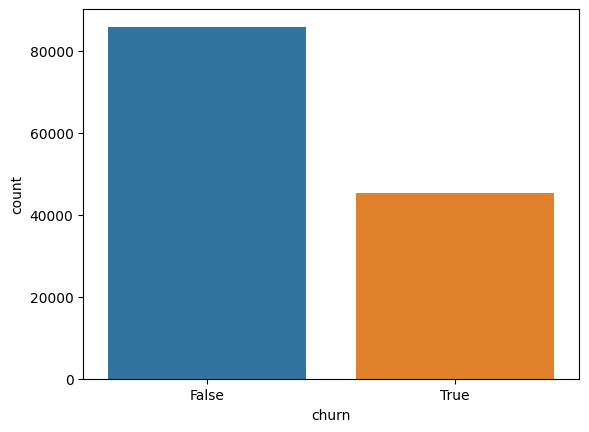

In [ ]:
#df_churn_object_order = df_churn['df_churn_object'].value_counts().index
column_name = 'email_domain'
col_order = df_churn[column_name].value_counts().index

sns.countplot(data=df_churn,
              x = column_name,
              order=col_order)

for column in df_churn_object:
  print(column)
  col_order = df_churn[column].value_counts().index

  sns.countplot(data=df_churn,
              x = column,
              order=col_order)

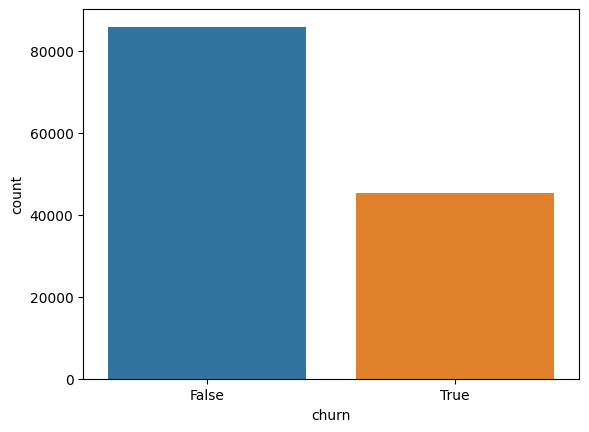

In [ ]:
for column in df_churn_object:
  col_order = df_churn[column].value_counts().index

  sns.countplot(data=df_churn,
              x = column,
              order=col_order)

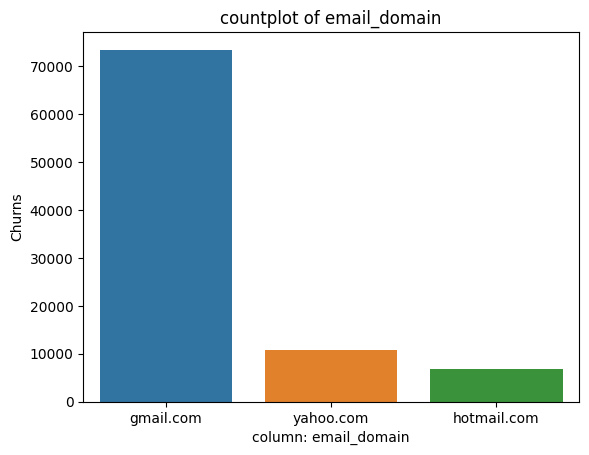

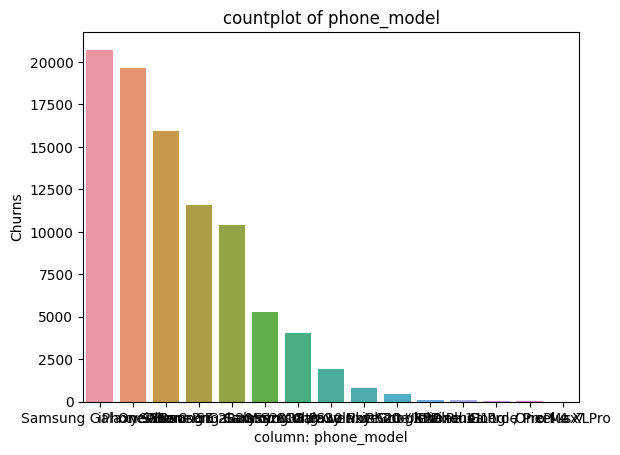

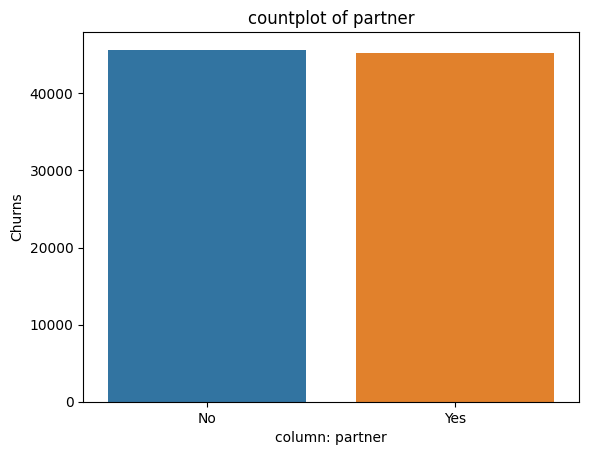

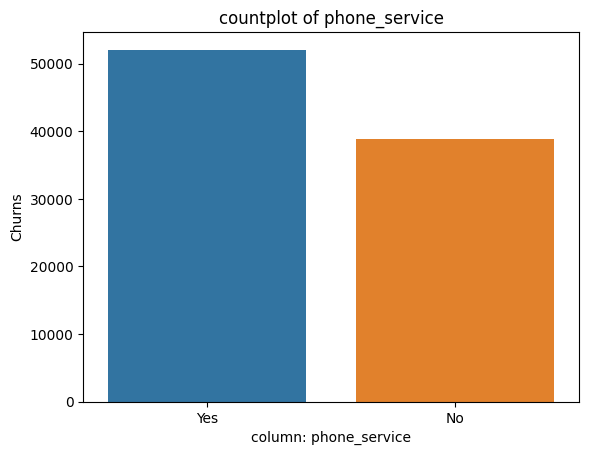

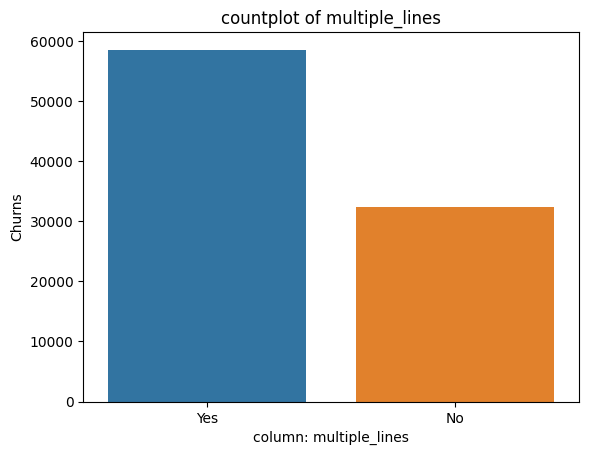

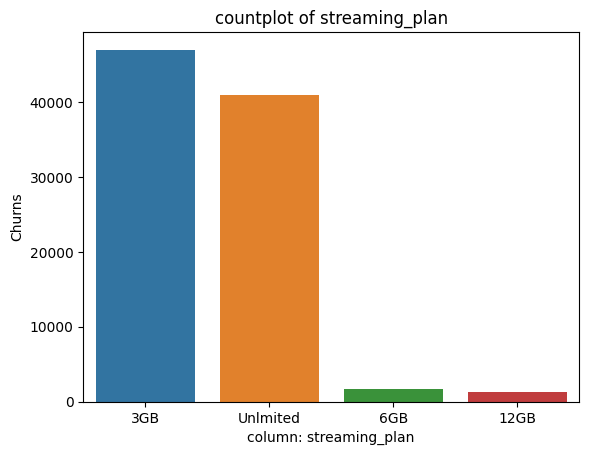

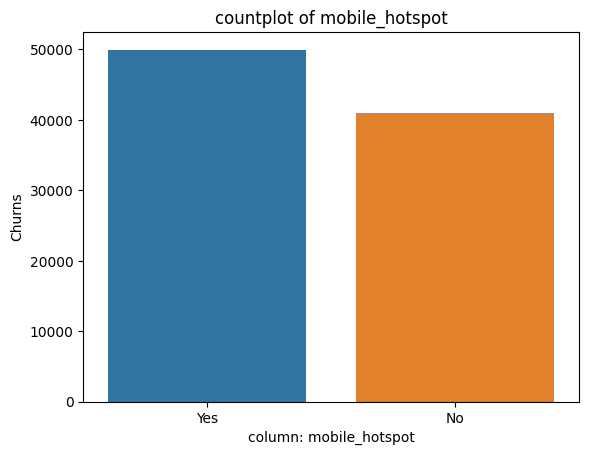

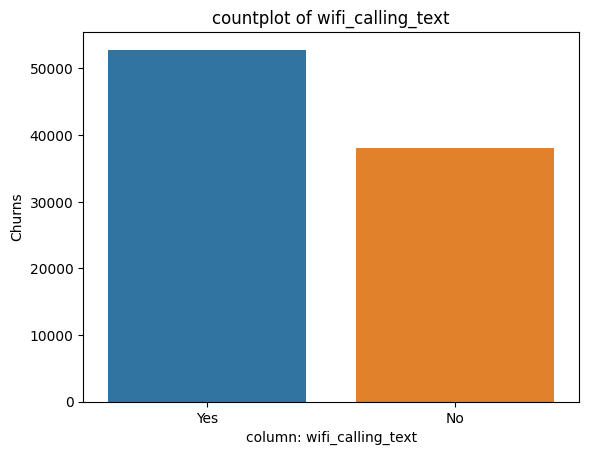

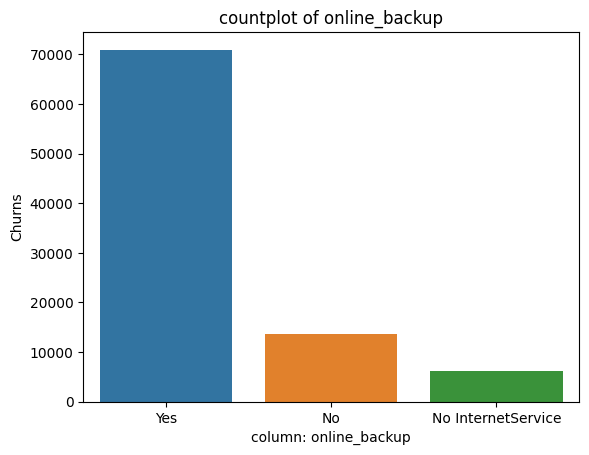

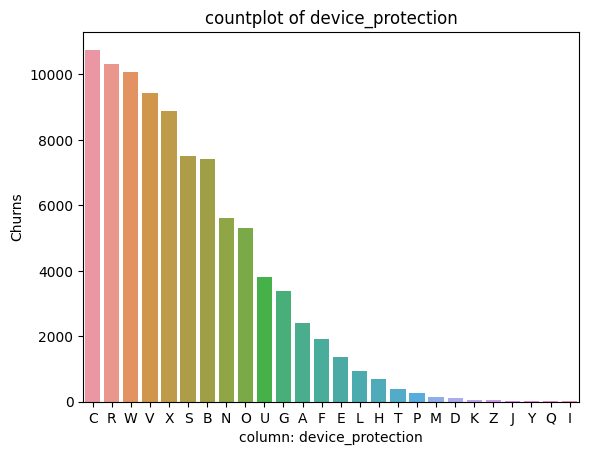

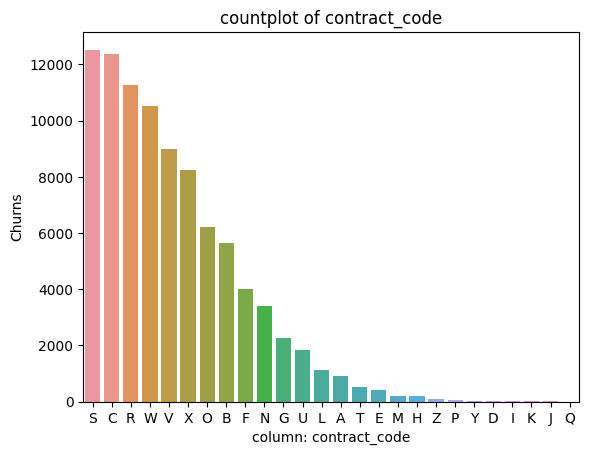

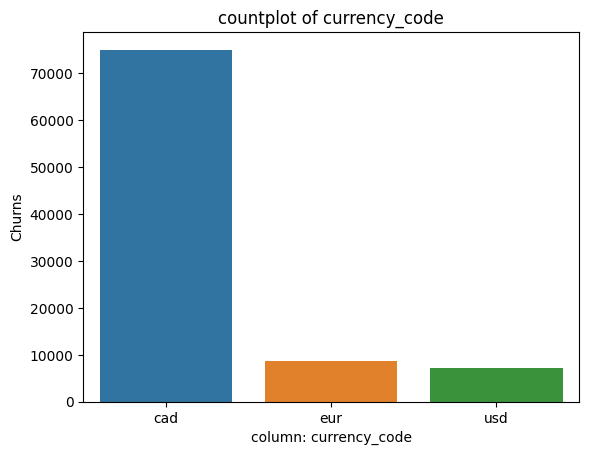

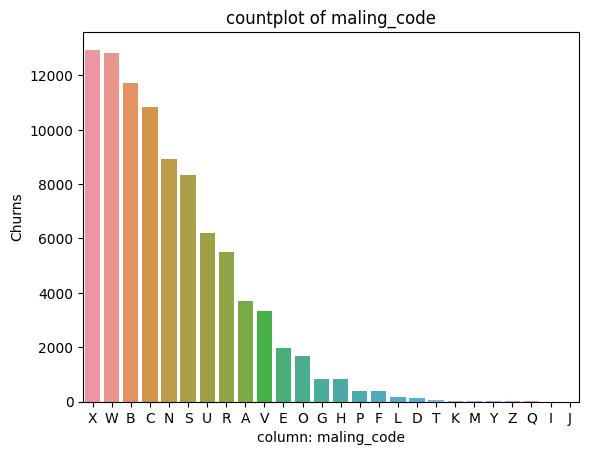

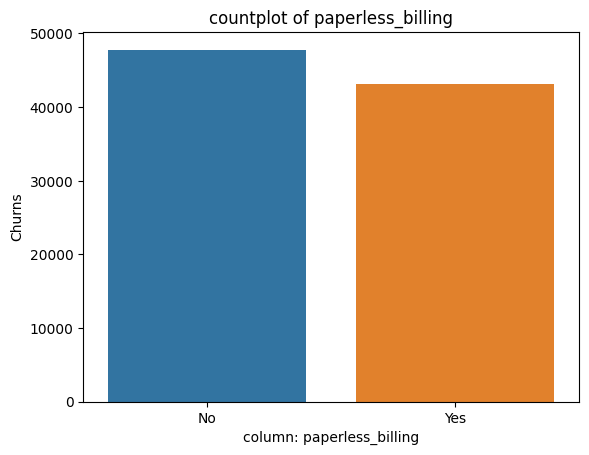

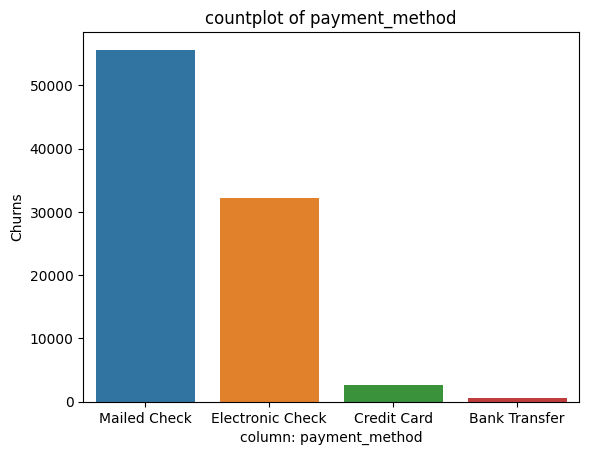

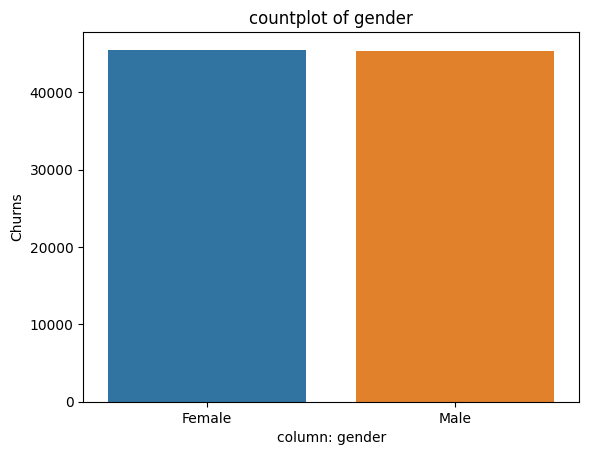

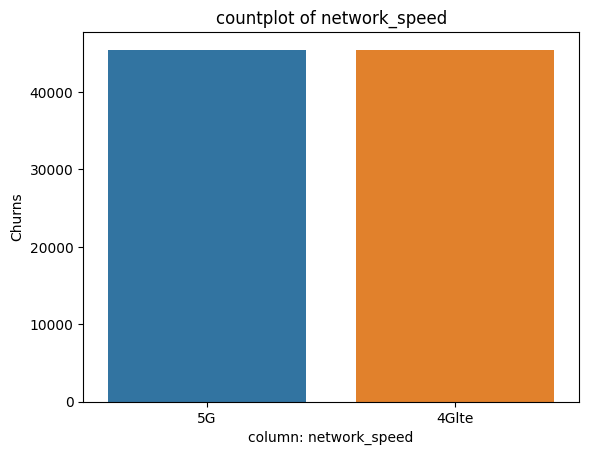

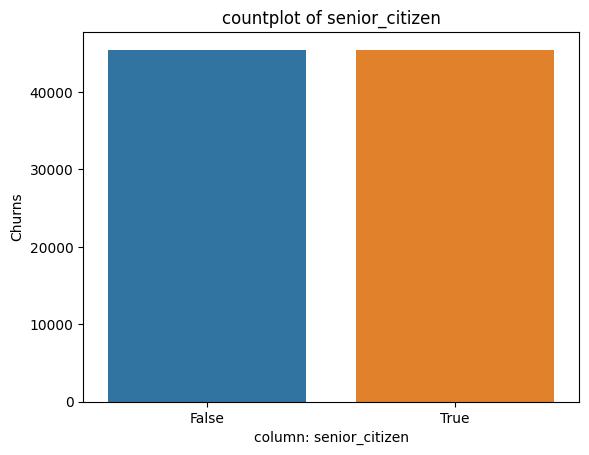

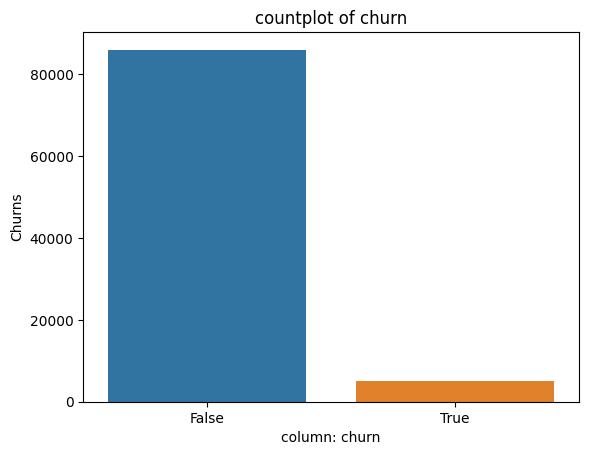

In [ ]:
for column in df_churn_object:
  col_order = df_churn[column].value_counts().index
  sns.countplot(data=df_churn, x = column,order=col_order)
  plt.title(f"countplot of {column}")
  plt.xlabel(f"column: {column}")
  plt.ylabel("Churns")
  plt.show()

In [ ]:
#Articulate 3 key observations you derived from the generated plots

#**Your Findings:**

**1. Customers that have multiple lines are more likely to churn- this confirms the previous graph of having multiple phones**

**2. The most common churners have the 3GB streaming plan- may be an indicator that they can't afford their phone**

**3. People with mobile hotspots are more likely to churn**

In [ ]:
#Ignore This
#for column in df_churn_object:
#  churn(column)

In [ ]:
#Ignore This
#for column in df_churn_object:
#  print(column)

In [ ]:
#Ignore This
#def churn(column):
  #plt.figure(figsize=(10,3))
  #col_order = df_churn[column].value_counts().index
  #sns.countplot(data=df_churn, x=column, hue='churn')
  #plt.title(f"countplot of {column}")
  #plt.xlabel(f"column: {column}")
  #plt.ylabel("Churns")
  #plt.show();
#churn(column)

In [ ]:
#Ignore this Baseline Code
#object_test_column = 'gender'

#plt.figure(figsize=(10,3))
#col_order= df_churn[column].value_counts().index
#sns.countplot(data=df_churn, x=object_test_column, hue='churn')
#plt.title(f"countplot of {object_test_column}")
#plt.xlabel(f"column: {object_test_column}")
#plt.ylabel("Churns")
#plt.show()

In [ ]:
#Ignore This
#def churn(object_test_column):
#  plt.figure(figsize=(10,3))
#  col_order= df_churn[column].value_counts().index
#  sns.countplot(data=df_churn, x=object_test_column, hue='churn')
#  plt.title(f"countplot of {object_test_column}")
#  plt.xlabel(f"column: {object_test_column}")
#  plt.ylabel("Churns")
#  plt.show();
#churn(object_test_column)


## Task 4. Analyze & Answer Questions (Part I)

1. States with the most/least churns

- Create a dataset `churn_True` which includes only churned customers
- Use `groupby()` and count `customer_id`
- Identify the **top 5** states with the highest number of churns using `nlargest()`
- Identify the **bottom 3** states with the lowest number of churns using `sort_values()`
- Create a bar chart to visualize the customer count by state - rank your bars in a **descending order**

In [ ]:
#Using NB 3.1, 2.8, presentation 1
# PPts 3.1 and 2.3

In [ ]:
#df_churn['churn_True'] = df_churn['churn'].rank(ascending=False)
#churn_True = df_churn.sort_values(['churn_True'], ascending=True)
#churn_True
churn_True = df_churn[df_churn['churn'] == True]
churn_True

,monthly_minutes,customer_service_calls,streaming_minutes,total_billed,prev_balance,late_payments,ip_address_asn,phone_area_code,customer_reg_date,email_domain,...,maling_code,paperless_billing,payment_method,customer_id,billing_address,gender,network_speed,senior_citizen,churn,phone_are_code
9,19608.0,2.0,29231.0,170.0,39.0,7.0,45808.0,243.0,2020-10-16,hotmail.com,...,U,No,Mailed Check,1-130-86539-8.11,13939 Jeffrey Knoll Suite 209,Male,5G,False,True,243.0
19,32861.0,1.0,16493.0,151.0,55.0,4.0,18069.0,247.0,2020-09-08,gmail.com,...,R,No,Mailed Check,0-7037-2425-8.24,93876 Michael Skyway,Female,4Glte,False,True,247.0
20,18885.0,2.0,28510.0,185.0,52.0,6.0,47947.0,257.0,2020-07-19,gmail.com,...,X,No,Electronic Check,1-214-28046-3.25,8627 Mark Street Suite 323,Female,5G,True,True,257.0
47,22812.0,2.0,20336.0,239.0,43.0,3.0,55460.0,245.0,2020-06-22,gmail.com,...,W,No,Electronic Check,1-61668-874-2.54,183 Potts Streets,Female,4Glte,False,True,245.0
67,21356.0,1.0,21081.0,227.0,26.0,6.0,47395.0,246.0,2020-01-25,gmail.com,...,U,No,Mailed Check,0-692-50023-5.77,980 Jason Mountain,Female,5G,False,True,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90819,21501.0,1.0,19329.0,186.0,72.0,3.0,51172.0,278.0,2020-07-23,gmail.com,...,I,No,Mailed Check,1-919053-60-3.100909,6743 Ward Path Apt. 995,Female,5G,False,True,278.0
90874,18035.0,2.0,32798.0,189.0,46.0,4.0,15842.0,257.0,2019-11-20,gmail.com,...,V,No,Bank Transfer,1-67076-074-X.100969,1504 Thompson Courts Apt. 258,Male,5G,False,True,257.0
90878,14867.0,2.0,15062.0,211.0,44.0,6.0,56967.0,261.0,2020-03-31,gmail.com,...,G,No,Electronic Check,1-06-524253-0.100973,552 Gonzalez Highway,Female,5G,False,True,261.0
90881,20132.0,2.0,17638.0,180.0,49.0,4.0,50683.0,257.0,2020-05-19,gmail.com,...,V,No,Mailed Check,1-321-36986-7.100978,6000 Elizabeth Circle Apt. 666,Male,4Glte,True,True,257.0


In [ ]:
#Use groupby() and count customer_id
grouped_churn_True = churn_True.groupby('billing_state')
grouped_churn_True['customer_id'].count()

billing_state
Alabama             1
Alaska            440
California          3
Colorado          229
Connecticut       420
Delaware           55
Florida           159
Idaho             190
Illinois          174
Iowa               23
Kansas            301
Maryland          257
Massachusetts      60
Michigan          252
Minnesota           9
Mississippi         7
Nebraska           50
Nevada             61
New Jersey        397
New York          118
North Dakota       32
Ohio               20
Oregon             11
Pennsylvania      130
Rhode Island        4
South Carolina     86
South Dakota      376
Tennessee           1
Texas             354
Utah                1
Vermont            12
Virginia          384
Washington        355
Wisconsin           1
Name: customer_id, dtype: int64

In [ ]:
#Identify the top 5 states with the highest number of churns using nlargest()
grouped_churn_True['customer_id'].count().nlargest(5)

billing_state
Alaska          440
Connecticut     420
New Jersey      397
Virginia        384
South Dakota    376
Name: customer_id, dtype: int64

In [ ]:
#Identify the top 5 states with the highest number of churns using nlargest()
#grouped_churn_True.rank(method='max',ascending=True,na_option='bottom').head(5).reset_index()
#churn_True.nlargest(5,'')

In [ ]:
#Identify the bottom 3 states with the lowest number of churns using sort_values()
#grouped_churn_True.rank(method='max',ascending=False,na_option='bottom').head(3)
grouped_churn_True['customer_id'].count().sort_values(ascending=False).tail(3)
#nba = nba.sort_values(['salary_rank'], ascending=True)

billing_state
Utah         1
Tennessee    1
Wisconsin    1
Name: customer_id, dtype: int64

In [ ]:
#Helpful .sort_values template
#hr_leaders = hr_leaders.sort_values(['Home Run Leaders'], ascending = True)

In [ ]:
#bottom_3_states = churn_True.sort_values([churn_True], ascending = True)
#bottom_3_states

In [ ]:
churn_True['billing_state']

9        South Dakota
19           Virginia
20           Illinois
47           Michigan
67       South Dakota
             ...     
90819        Maryland
90874          Kansas
90878     Connecticut
90881        New York
90891          Kansas
Name: billing_state, Length: 4975, dtype: object

In [ ]:
customer_count= pd.DataFrame(grouped_churn_True['customer_id'].count().nlargest(50,keep='all').reset_index())
customer_count
#top_n_provider_types = phys['Provider_Type'].value_counts().nlargest(10).index

,billing_state,customer_id
0,Alaska,440
1,Connecticut,420
2,New Jersey,397
3,Virginia,384
4,South Dakota,376
5,Washington,355
6,Texas,354
7,Kansas,301
8,Maryland,257
9,Michigan,252


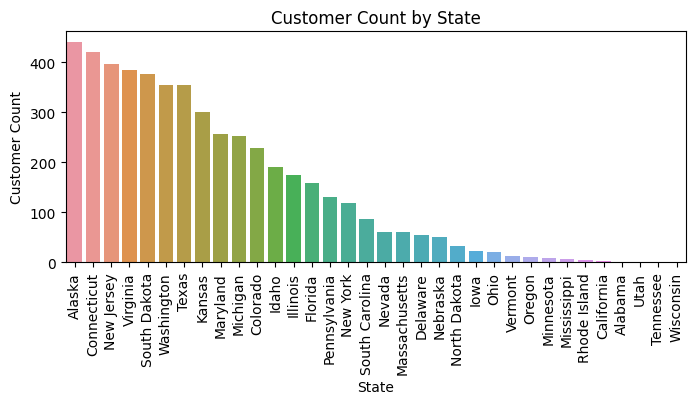

In [ ]:
#Create a bar chart to visualize the customer count by state - rank your bars in a descending order
plt.figure(figsize=(8, 3))
sns.barplot(data=customer_count,
              x='billing_state',
              y='customer_id',)
plt.title('Customer Count by State')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Customer Count')
plt.show()

This chart is significant becaue it shows that there are a lot of customers in Alaska, but maybe more importantly is that they are 17 states that do not have customers at all

2. Customers with the highest/lowest total bill amount

- Identify the **top 5 customers** with the highest bill amount（i.e., the top group）

- Identify the **bottom 5 customers** with the lowest bill amount（i.e., the bottom group）

- Summarize variables in both groups using `describe()` - What did you find by comparing the summaries?


In [ ]:
churn_True.columns

Index(['monthly_minutes', 'customer_service_calls', 'streaming_minutes',
       'total_billed', 'prev_balance', 'late_payments', 'ip_address_asn',
       'phone_area_code', 'customer_reg_date', 'email_domain', 'phone_model',
       'billing_city', 'billing_postal', 'billing_state', 'partner',
       'phone_service', 'multiple_lines', 'streaming_plan', 'mobile_hotspot',
       'wifi_calling_text', 'online_backup', 'device_protection',
       'number_phones', 'contract_code', 'currency_code', 'maling_code',
       'paperless_billing', 'payment_method', 'customer_id', 'billing_address',
       'gender', 'network_speed', 'senior_citizen', 'churn', 'phone_are_code'],
      dtype='object')

In [ ]:
#use regular churn columns
#Top 5 Highest Bill
highest_bill= churn_True['total_billed'].sort_values(ascending=False).head(5)
highest_bill

14576    349.0
20098    337.0
47093    337.0
72882    333.0
9904     331.0
Name: total_billed, dtype: float64

In [ ]:
#Bottom 5 Lowest Bill
lowest_bill= churn_True['total_billed'].sort_values(ascending=True).head(5)
lowest_bill

41030    100.0
27003    110.0
61929    111.0
39668    114.0
63879    114.0
Name: total_billed, dtype: float64

In [ ]:
highest_bill.describe()

count      5.0000
mean     337.4000
std        6.9857
min      331.0000
25%      333.0000
50%      337.0000
75%      337.0000
max      349.0000
Name: total_billed, dtype: float64

In [ ]:
lowest_bill.describe()

count      5.000000
mean     109.800000
std        5.761944
min      100.000000
25%      110.000000
50%      111.000000
75%      114.000000
max      114.000000
Name: total_billed, dtype: float64

#**Your Findings:**
**The standard deviation of the customers with the highest bills is higher than the standard deviation of the customers with the lowest.  This means that the customers with high bills have much more variability than the customers with low bills.**

In [ ]:
#Ignore, Not what was wanted (Task 4.1 )
#churn_state_mask = df_churn['billing_state']
#churn_state_mask

In [ ]:
#Ignore, Not what was wanted (Task 4.1)
#filtered_df_churn_True = df_churn[churn_True_mask] #& df_churn[churn_state_mask]
#filtered_df_churn_True

In [ ]:
#Ignore, not what was wanted, Another Way to make mask though
#df_churn[ df_churn['churn']== True]

## Task 5. Analyze & Answer Questions (Part II)

1. Explore the target variable: Create a bar chart to show the percentage of churners? (value counts on churn column, value counts equal true, should add up to 100)

2. Explore numerical variables: Create **three** boxplots to inform the following questions (Be sure to explain your reasoning based on the chart)
- Does the total bill amount influence churn? (churn = true, churn = false)
- Does monthly usage influence churn?
- Does monthly streaming influence churn?

3. Explore categorical variables:
  
  The company believes churn is influenced by the **network speed** (5G or 4G LTE) and the **phone model**; customers who opt for **paperless billing** are less likely to churn. Do you agree? Create 3 charts that can effectively test these ideas.

4. Explore any relationships of your interest (i.e. things you found interesting that may influence customer churn). Provide **3-4 Key findings** based on your charts.

In [ ]:
churn_True['churn'].value_counts()

True    4975
Name: churn, dtype: int64

In [ ]:
df_churn['churn'].value_counts()

False    85926
True      4975
Name: churn, dtype: int64

In [ ]:
churn_percent = df_churn['churn'].value_counts('False')
churn_percent

False    0.94527
True     0.05473
Name: churn, dtype: float64

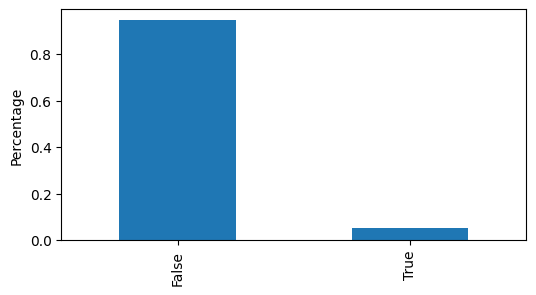

In [ ]:
#Explore the target variable: Create a bar chart to show the percentage of churners?
churn_percent.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.show()

This chart is significant because it gives perspective of the fact that a vast majority of customers are retained.

In [ ]:
df_churn.columns

Index(['monthly_minutes', 'customer_service_calls', 'streaming_minutes',
       'total_billed', 'prev_balance', 'late_payments', 'ip_address_asn',
       'phone_area_code', 'customer_reg_date', 'email_domain', 'phone_model',
       'billing_city', 'billing_postal', 'billing_state', 'partner',
       'phone_service', 'multiple_lines', 'streaming_plan', 'mobile_hotspot',
       'wifi_calling_text', 'online_backup', 'device_protection',
       'number_phones', 'contract_code', 'currency_code', 'maling_code',
       'paperless_billing', 'payment_method', 'customer_id', 'billing_address',
       'gender', 'network_speed', 'senior_citizen', 'churn', 'phone_are_code',
       'true_flag'],
      dtype='object')

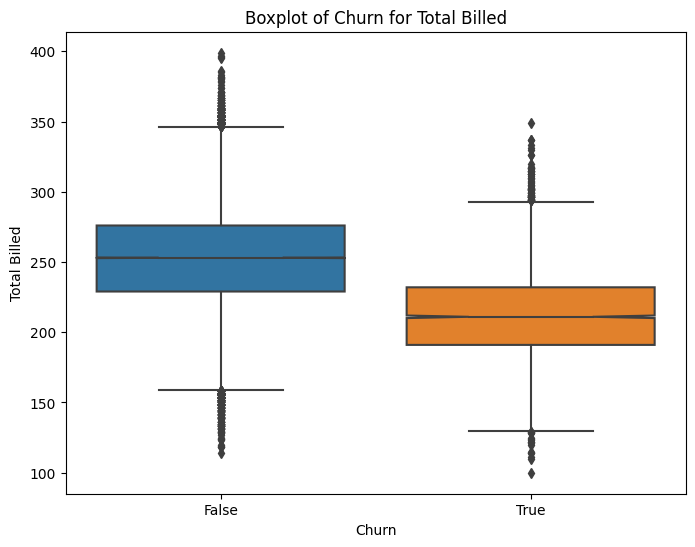

In [ ]:
#Explore numerical variables: Create a boxplot to inform the following question
#(Be sure to explain your reasoning based on the chart)
#- Does the total bill amount influence churn? (churn = true, churn = false)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_churn, x='churn', y='total_billed', notch=True, )
plt.title('Boxplot of Churn for Total Billed')
plt.xlabel('Churn')
plt.ylabel('Total Billed')
plt.show()

The total bill amount could influence churn, as the customers with a lower bill amount are more likely to churn, although there is a lot of variability for the bill amount of customers and their decision to churn or not.

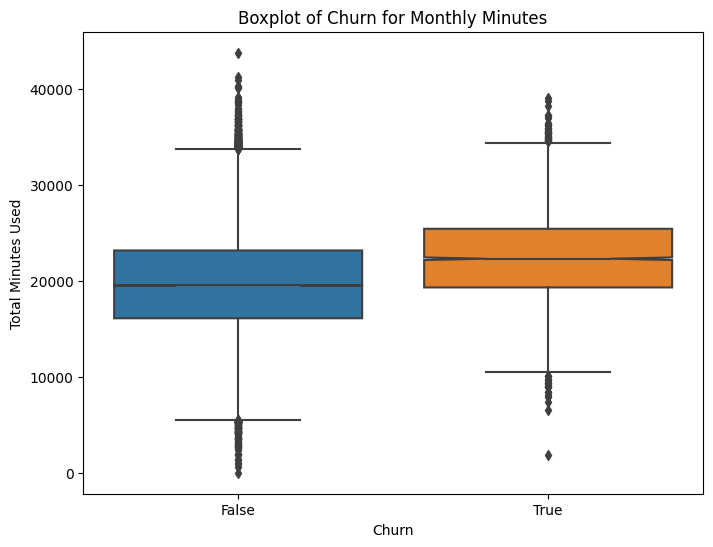

In [ ]:
#Explore numerical variables: Create a boxplot to inform the following question
#(Be sure to explain your reasoning based on the chart)
#- Does monthly usage influence churn?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_churn, x='churn', y='monthly_minutes', notch=True, )
plt.title('Boxplot of Churn for Monthly Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Minutes Used')
plt.show()

Monthly minutes could be an influence in customer churn, as the customers that have churned have a noticibly higher average monthly usage than the customers that have not churned, but there is still a lot of variability for customers that have not churned.

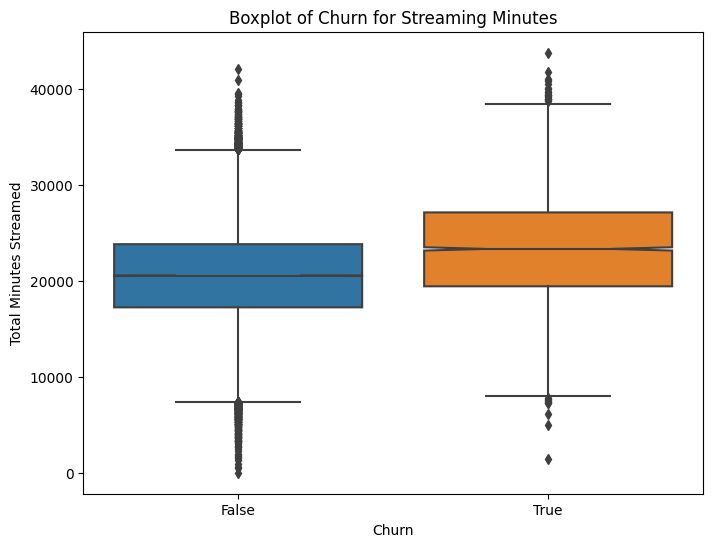

In [ ]:
#Explore numerical variables: Create a boxplot to inform the following question
#(Be sure to explain your reasoning based on the chart)
#- Does monthly streaming influence churn?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_churn, x='churn', y='streaming_minutes', notch=True, )
plt.title('Boxplot of Churn for Streaming Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Minutes Streamed')
plt.show()

Streaming minutes does seem to influence churn, as the average amount of streaming minutes for customers that churned was higher than customers that did not churn.

In [ ]:
df_churn.columns

In [ ]:
#grouped_churn_counts = df_churn.groupby('churn')
#grouped_churn_counts

In [ ]:
#churn_counts = pd.DataFrame(grouped_churn_counts['churn'].count().nlargets.reset_index)
#churn_counts
#customer_count= pd.DataFrame(grouped_churn_True['customer_id'].count().nlargest(50,keep='all').reset_index())

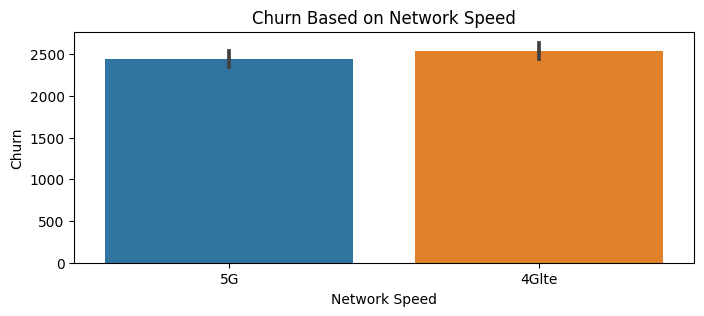

In [ ]:
#Explore categorical variables:
#The company believes churn is influenced by the network speed (5G or 4G LTE) and the phone model;
#customers who opt for paperless billing are less likely to churn.
#Do you agree? Create 3 charts that can effectively test these ideas.
plt.figure(figsize=(8, 3))
sns.barplot(data=df_churn,
              x='network_speed',
              y='churn',
              estimator=np.sum)
plt.title('Churn Based on Network Speed')
plt.xlabel('Network Speed')
plt.ylabel('Churn')
plt.show()


Network Speed may have a slight influence on churn, as there is a small difference between 4G and 5G churn rates.

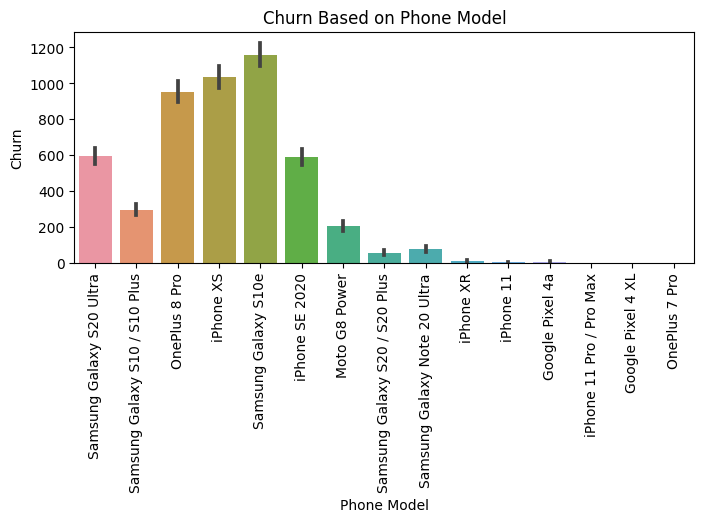

In [ ]:
#Network Speed
plt.figure(figsize=(8, 3))
sns.barplot(data=df_churn,
              x='phone_model',
              y='churn',
              estimator=np.sum)
plt.title('Churn Based on Phone Model')
plt.xlabel('Phone Model')
plt.ylabel('Churn')
plt.xticks(rotation=90)
plt.show()

Customers with a Samsung Galaxy S10e have a significant amount of churn compared to other phone types.

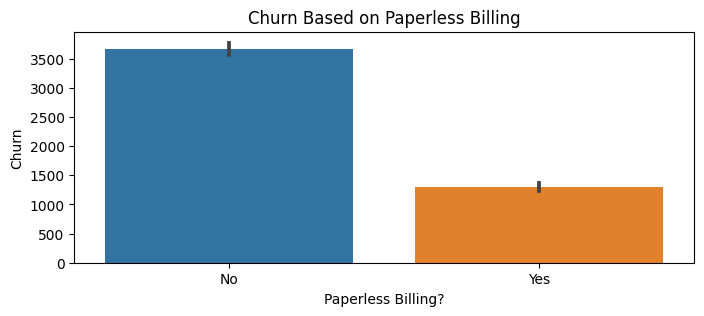

In [ ]:
#Paperless Billing
plt.figure(figsize=(8, 3))
sns.barplot(data=df_churn,
              x='paperless_billing',
              y='churn',
              estimator=np.sum)
plt.title('Churn Based on Paperless Billing')
plt.xlabel('Paperless Billing?')
plt.ylabel('Churn')
plt.show()

Customers that do not do paperless billing have a significant amount of churn compared to customers that use paperless billing.

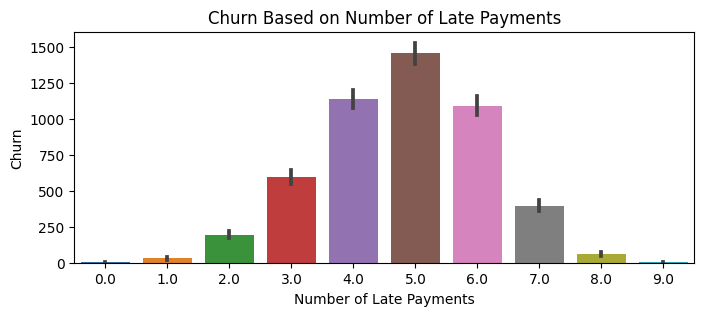

In [ ]:
#Explore any relationships of your interest (i.e. things you found interesting that may influence customer churn).
#Provide 3-4 Key findings based on your charts.
plt.figure(figsize=(8, 3))
sns.barplot(data=df_churn,
              x='late_payments',
              y='churn',
              estimator=np.sum)
plt.title('Churn Based on Number of Late Payments')
plt.xlabel('Number of Late Payments')
plt.ylabel('Churn')
plt.show()

Your Findings:
1. Customers with a Samsung Galaxy S10e have a significant amount of churn compared to other phone types.
2. Customers that do not do paperless billing have a significant amount of churn compared to customers that use paperless billing.
3. Customers with between 4 and 6 late payments are the most likely to churn.

## Finally
Wrap this up in a notebook and convert it to **HTML**, to exceed the bar - make sure things look good.

In [ ]:
#%%shell
#jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Projects/Project 3/pandas_seaborn_201_Nik_Baldis.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Projects/Project 3/pandas_seaborn_201_Nik_Baldis.ipynb to html
[NbConvertApp] Writing 2030041 bytes to /content/drive/MyDrive/Colab Notebooks/Projects/Project 3/pandas_seaborn_201_Nik_Baldis.html
